In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

In [2]:
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}

data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


<AxesSubplot:xlabel='x', ylabel='y'>

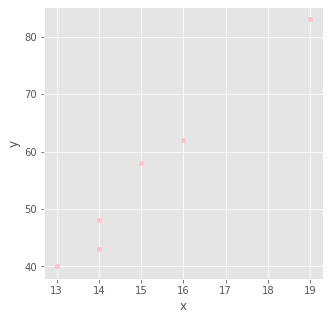

In [4]:
data.plot(kind="scatter",
          x='x',
          y='y',
          figsize=(5,5),
          color="pink") 

In [5]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))

In [6]:
residuals = data["y"] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [7]:
SSE = (residuals**2).sum()
SST = ((data["y"]-data["y"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.9753156179610034


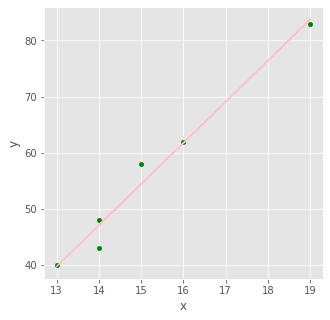

In [8]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="green")

plt.plot(data["x"],prediction,color="pink")

In [9]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736


In [10]:
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [12]:
data_frame.columns = boston_house_prices.feature_names
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [13]:
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<AxesSubplot:xlabel='RM', ylabel='Price'>

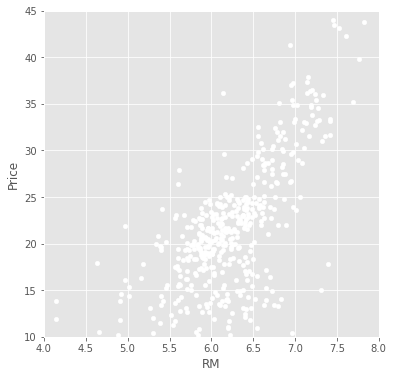

In [16]:
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6),
                color="white", xlim = (4,8), ylim = (10,45))

In [17]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))
print('a value = ', linear_regression.intercept_)
print('b balue =', linear_regression.coef_)

a value =  -34.670620776438554
b balue = [9.10210898]


In [18]:
residuals = data_frame["Price"] - prediction
residuals.describe()

count    5.060000e+02
mean    -1.330512e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [19]:
SSE = (residuals**2).sum()
SST = ((data_frame["Price"]-data_frame["Price"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4835254559913341


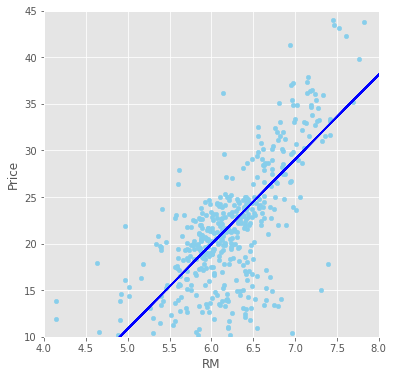

In [21]:
data_frame.plot(kind="scatter",x="RM",y="Price",figsize=(6,6),
                color="skyblue", xlim = (4,8), ylim = (10,45))

plt.plot(data_frame["RM"],prediction,color="blue")

In [22]:
print('score = ', linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"]))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data_frame["Price"]))
print('RMSE = ', mean_squared_error(prediction, data_frame["Price"])**0.5)

score =  0.48352545599133423
Mean_Squared_Error =  43.60055177116956
RMSE =  6.603071389222561
